In [1]:
# Import Necessary Libraries

import os
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np

from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import yfinance as yf
#from nsepy import get_history

In [2]:
sbin=pd.read_csv('bitcoin.csv')

df_close=sbin['Close'].reset_index()

print(sbin.head())
print(sbin.info())



        Date    Close  Opening     High      Low Trading_volume  Price
0  2/10/2024  47329.1  47128.0  47498.1  46875.0         60.82K  0.43%
1   2/9/2024  47127.5  45293.3  48118.8  45254.2         98.11K  4.05%
2   2/8/2024  45293.3  44346.2  45579.2  44336.4         66.38K  2.15%
3   2/7/2024  44339.8  43088.4  44367.9  42783.5         48.57K  2.91%
4   2/6/2024  43087.7  42697.6  43375.5  42566.8         33.32K  0.91%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4956 entries, 0 to 4955
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4956 non-null   object 
 1   Close           4956 non-null   float64
 2   Opening         4956 non-null   float64
 3   High            4956 non-null   float64
 4   Low             4956 non-null   float64
 5   Trading_volume  4950 non-null   object 
 6   Price           4956 non-null   object 
dtypes: float64(4), object(3)
memory usage: 271.2+ KB
None


In [3]:

sbin['Close'] = pd.to_numeric(sbin['Close'])

#sbin['Open'] = pd.to_numeric(sbin['Open'], errors='coerce')
#sbin['High'] = pd.to_numeric(sbin['High'], errors='coerce')

sbin['Date'] = pd.to_datetime(sbin['Date'], errors='coerce')
print(sbin.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4956 entries, 0 to 4955
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            4956 non-null   datetime64[ns]
 1   Close           4956 non-null   float64       
 2   Opening         4956 non-null   float64       
 3   High            4956 non-null   float64       
 4   Low             4956 non-null   float64       
 5   Trading_volume  4950 non-null   object        
 6   Price           4956 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 271.2+ KB
None


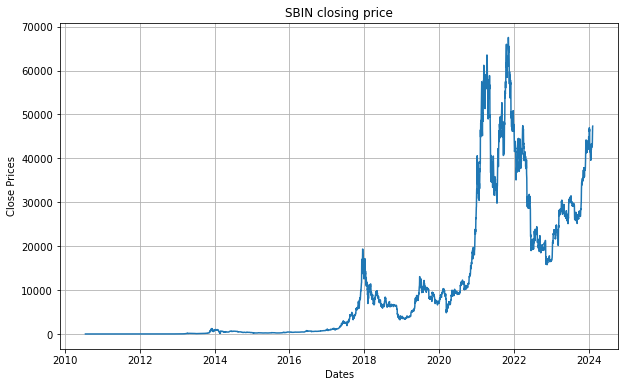

In [4]:
# Plotting Time data

plt.figure(figsize=(10,6))
plt.grid(True)

plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(sbin['Date'],sbin['Close'])
plt.title('SBIN closing price')
plt.show()

In [6]:
# Re-arranging Index

df1=sbin.iloc[::-1]
print(df1.head())
print(df1.shape)
df2=pd.DataFrame(data=df1.values, columns=df1.columns, index=range(0,df1.shape[0]))
print(df2.head())

           Date  Close  Opening  High  Low Trading_volume  Price
4955 2010-07-18    0.1      0.0   0.1  0.1          0.08K  0.00%
4954 2010-07-19    0.1      0.1   0.1  0.1          0.57K  0.00%
4953 2010-07-20    0.1      0.1   0.1  0.1          0.26K  0.00%
4952 2010-07-21    0.1      0.1   0.1  0.1          0.58K  0.00%
4951 2010-07-22    0.1      0.1   0.1  0.1          2.16K  0.00%
(4956, 7)
        Date Close Opening High  Low Trading_volume  Price
0 2010-07-18   0.1     0.0  0.1  0.1          0.08K  0.00%
1 2010-07-19   0.1     0.1  0.1  0.1          0.57K  0.00%
2 2010-07-20   0.1     0.1  0.1  0.1          0.26K  0.00%
3 2010-07-21   0.1     0.1  0.1  0.1          0.58K  0.00%
4 2010-07-22   0.1     0.1  0.1  0.1          2.16K  0.00%


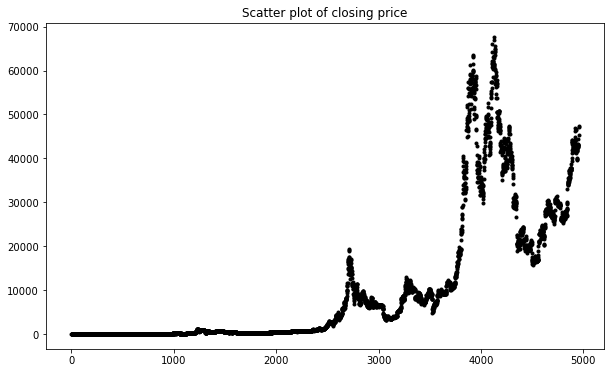

In [7]:
# Scatter Plot of re-arranged indexed dataframe


plt.figure(figsize=(10,6))
df_close = df2['Close']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

In [8]:
print(df1.describe())

              Close       Opening          High           Low
count   4956.000000   4956.000000   4956.000000   4956.000000
mean   10379.126634  10369.654822  10625.785149  10092.829944
std    15244.997412  15236.780600  15612.701404  14823.763936
min        0.100000      0.000000      0.100000      0.000000
25%      225.225000    224.925000    230.550000    220.375000
50%     1344.100000   1334.600000   1357.550000   1311.950000
75%    13476.750000  13447.925000  13845.325000  12876.725000
max    67527.900000  67528.700000  68990.600000  66334.900000


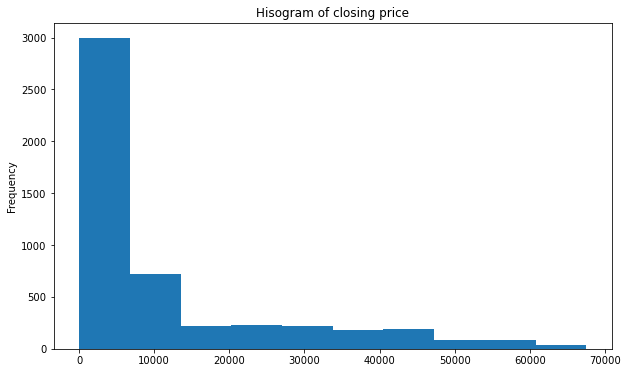

In [9]:
# Histogram of Closing Price of BitCoin

plt.figure(figsize=(10,6))
#df_close = sbin.Close[sbin.Close.index[::-1]].values
df_close.plot(style='k.',kind='hist')
plt.title('Hisogram of closing price')
plt.show()

Neural Network

In [10]:
# import libraries

import math
import pandas as pd
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Conv1D, MaxPooling1D, Flatten
import matplotlib.pyplot as plt
import os
from pandas_datareader import data as pdr
import yfinance as yf

plt.style.use('fivethirtyeight')

In [25]:
# Selecting data points as the paper

idxs=df2.index[df2['Date']=='2012-01-06'].values
#print(idxs, df2.Close[idxs])
#print(idxs)
idxn=df2.index[df2['Date']=='2020-01-23'].values
#print('ddd',idxn)

dataT=df2.filter(['Close'])  # Total dataset

data=dataT[int(idxs):int(idxn)]  # Dataset equal to the paper

#print(data)
dataset=data.values
#print('dataset = ', dataset)


In [26]:
# Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

#print(scaled_data)

In [27]:
# Create the training dataset


training_data_len=math.ceil(len(dataset)* 0.8)
print(training_data_len)



train_data=scaled_data[0:training_data_len,:]

x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    #if i <=61:
        #print(x_train)
        #print(y_train)

        
# create Test dataset


        
test_data=scaled_data[training_data_len -60: , :]

x_test=[]
y_test= dataset [training_data_len:, :]



for i in range (60, len(test_data)):
    x_test.append(test_data[i-60:i,0])
    

2352


In [28]:
#convert x_train and y_train to numpy array


x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape)


# convert data to numpy array 

x_test= np.array(x_test)
print(x_test.shape)



(2292, 60)
(587, 60)


In [29]:
#reshape the data

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
print(x_train.shape)


x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))
print(x_test.shape)



(2292, 60, 1)
(587, 60, 1)


In [19]:
print(y_test)

[[6410.3]
 [6505.8]
 [6460.3]
 [6719.8]
 [6752.4]
 [6765.4]
 [6728.0]
 [6055.7]
 [6167.3]
 [6154.6]
 [6256.6]
 [6082.1]
 [6154.9]
 [5883.5]
 [6213.3]
 [6398.9]
 [6366.8]
 [6619.5]
 [6513.5]
 [6598.4]
 [6546.5]
 [6617.7]
 [6765.5]
 [6714.8]
 [6667.1]
 [6307.2]
 [6389.1]
 [6250.6]
 [6230.2]
 [6254.8]
 [6362.9]
 [6729.9]
 [7322.0]
 [7383.6]
 [7477.5]
 [7339.4]
 [7408.7]
 [7412.3]
 [7723.0]
 [8407.0]
 [8173.7]
 [7937.0]
 [8187.4]
 [8234.1]
 [8215.6]
 [8177.1]
 [7729.4]
 [7606.4]
 [7535.6]
 [7419.0]
 [7014.3]
 [7027.1]
 [6943.6]
 [6724.9]
 [6283.6]
 [6538.8]
 [6152.3]
 [6231.6]
 [6313.0]
 [6255.3]
 [6190.2]
 [6256.9]
 [6306.7]
 [6581.7]
 [6379.1]
 [6481.5]
 [6268.1]
 [6482.2]
 [6359.6]
 [6521.2]
 [6680.4]
 [6734.8]
 [6712.7]
 [6897.6]
 [7074.6]
 [7029.1]
 [6993.7]
 [7033.8]
 [7189.6]
 [7293.9]
 [7264.2]
 [7377.5]
 [6706.8]
 [6514.0]
 [6390.9]
 [6184.3]
 [6238.5]
 [6321.0]
 [6293.9]
 [6338.0]
 [6482.9]
 [6483.7]
 [6519.0]
 [6500.2]
 [6251.9]
 [6342.0]
 [6390.4]
 [6489.2]
 [6766.7]
 [6729.6]


# Model Create and train 

In [16]:
# LSTM-Attention-Dense


import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, MultiHeadAttention, Dropout, GlobalAveragePooling1D, Reshape
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt



# Transformer Block
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = LayerNormalization(epsilon=1e-6)(inputs)
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = Dropout(dropout)(x)
    res = x + inputs

    x = LayerNormalization(epsilon=1e-6)(res)
    x = Dense(ff_dim, activation="relu")(x)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)
    return x + res

# Model Definition
inputs = Input(shape=(x_train.shape[1], x_train.shape[2]))
x = LSTM(60, return_sequences = True, input_shape = (60,1))(inputs)
x = LSTM(60, return_sequences = False)(x)
x = Reshape((60,1))(x)
x = Dropout(0.1)(x)
x = transformer_encoder(x, head_size=120, num_heads=5, ff_dim=5, dropout=0.15)
x = GlobalAveragePooling1D(data_format='channels_first')(x)
x = Dropout(0.1)(x)
x = Dense(30, activation="relu")(x)
outputs = Dense(1, activation="linear")(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer="adam", loss="mean_squared_error")

# Model Summary
model.summary()


model.fit(x_train, y_train,  epochs=12, batch_size=1, verbose=1)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 60, 1)]      0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 60, 60)       14880       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (None, 60)           29040       ['lstm[0][0]']                   
                                                                                                  
 reshape (Reshape)              (None, 60, 1)        0           ['lstm_1[0][0]']                 
                                                                                              

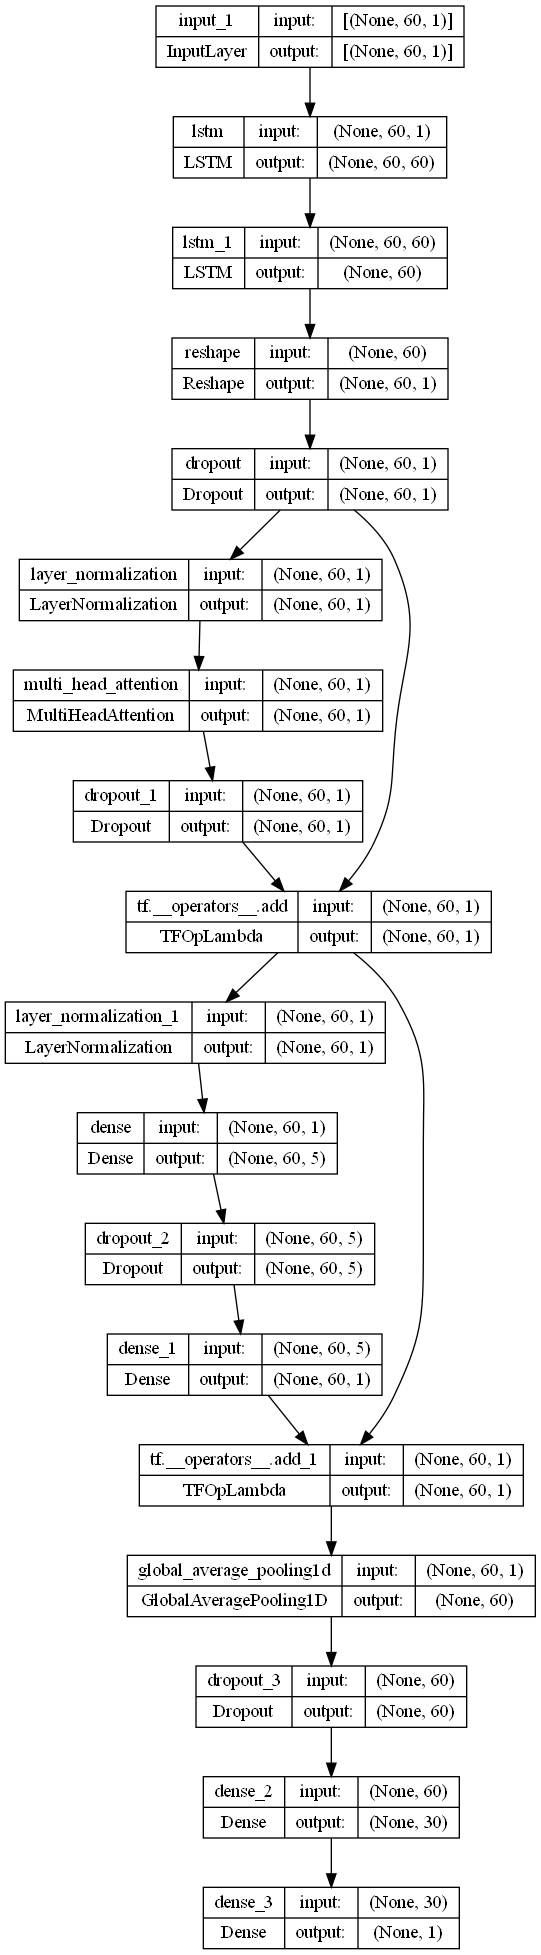

In [18]:
import keras

keras.utils.plot_model(model, "ensemble_model.png", show_shapes=True)

In [26]:
# More Training (if Required)

model.fit(x_train, y_train, batch_size=1, epochs=10)



Epoch 1/50
2584/2584 [==============================] - 25s 9ms/step - loss: 0.0140 - accuracy: 0.0000e+00 - mse: 0.0140
Epoch 2/50
1813/2584 [====================>.........] - ETA: 6s - loss: 0.0022 - accuracy: 5.5157e-04 - mse: 0.0022

KeyboardInterrupt: 

In [30]:
# Get the models predicted price values

predictions = model.predict(x_test)
print(predictions.shape)

predictions=np.reshape(predictions,(predictions.shape[0], predictions.shape[1]))
#print(x_test.shape)

# un-scaling 
predictions = scaler.inverse_transform(predictions)



NameError: name 'model' is not defined

In [24]:
#Get the root mean squared error (RMSE) 
rmse= np.sqrt( np.mean((predictions - y_test)**2))
print('Root Mean Square Error',rmse)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score


# Calculate test metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)

r2 = r2_score(y_test, predictions)
evs = explained_variance_score(y_test, predictions)

mape = np.mean(np.abs((y_test, predictions) / y_test)) * 100
mpe = np.mean((y_test, predictions) / y_test) * 100

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root-Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R2 Score: {r2}")
print(f"Explained Variance Score: {evs}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Mean Percentage Error (MPE): {mpe}")

Root Mean Square Error 331.09734077203086
Mean Squared Error (MSE): 109625.44906631034
Root-Mean Squared Error (RMSE): 331.09734077203086
Mean Absolute Error (MAE): 210.10938999384544
R2 Score: 0.9821181344211979
Explained Variance Score: 0.9825361029165431
Mean Absolute Percentage Error (MAPE): 99.63818957198689
Mean Percentage Error (MPE): 99.63818957198689


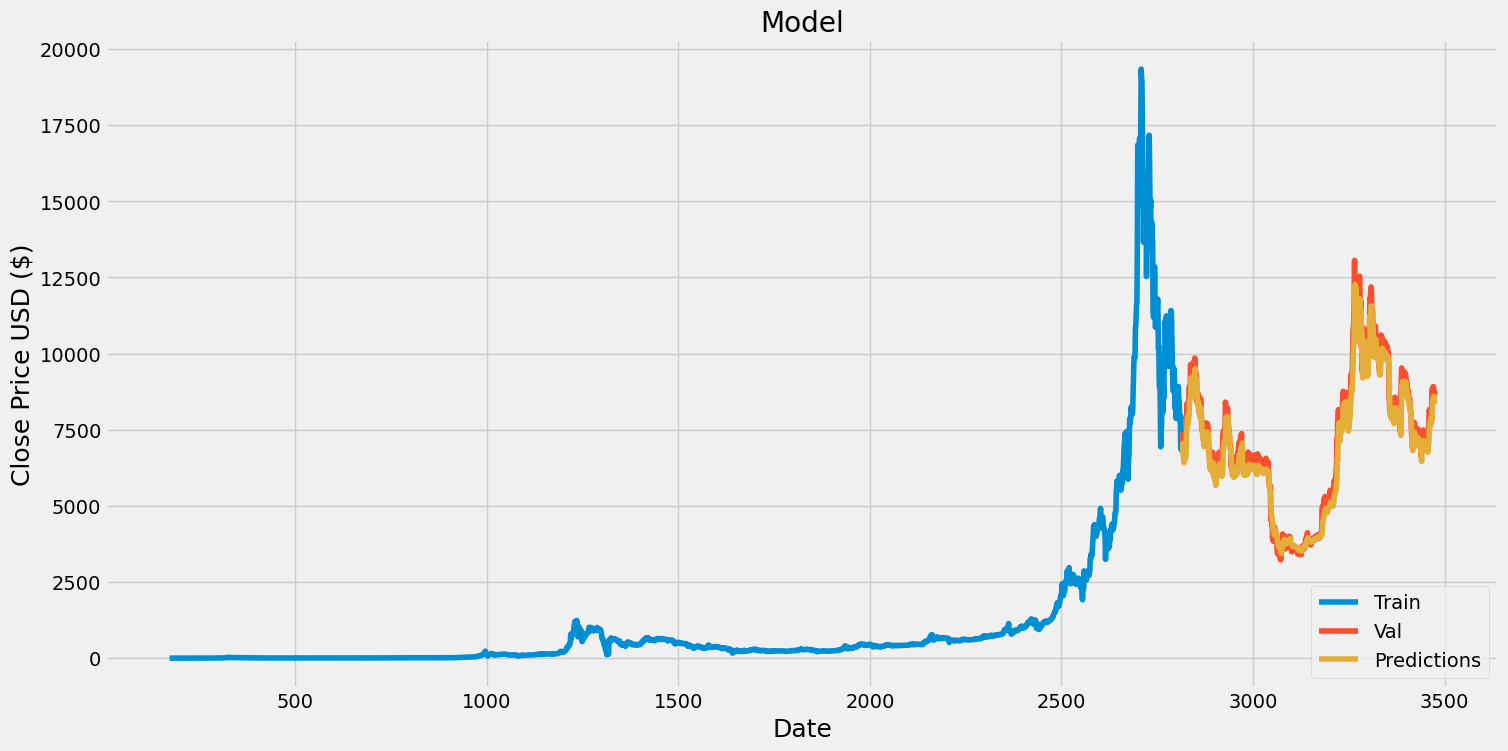

In [21]:
#plot the data

train=data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']=predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val', 'Predictions'], loc = 'lower right')

TypeError: loop of ufunc does not support argument 0 of type float which has no callable sqrt method

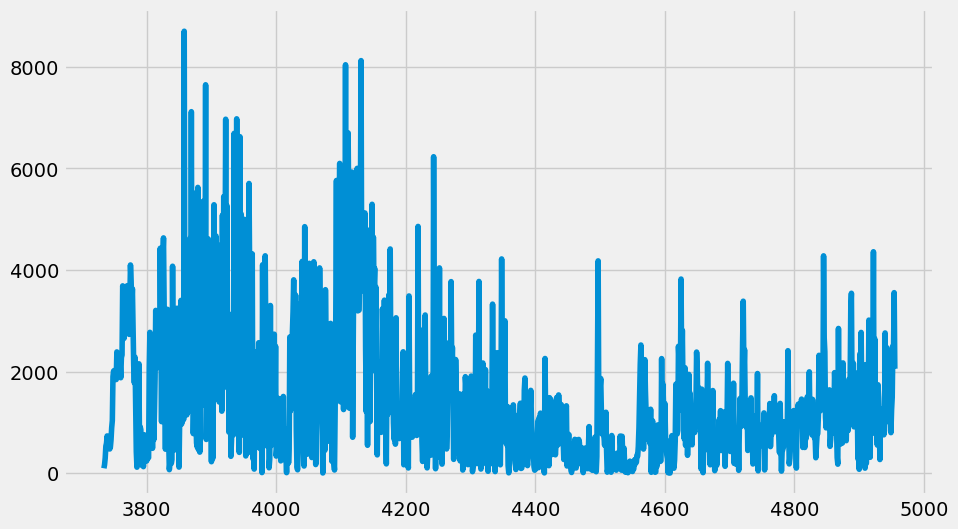

In [113]:
error=((y_test-predictions)**2)
plt.plot(error)

print(np.sqrt(np.sum(error)/len(error)))

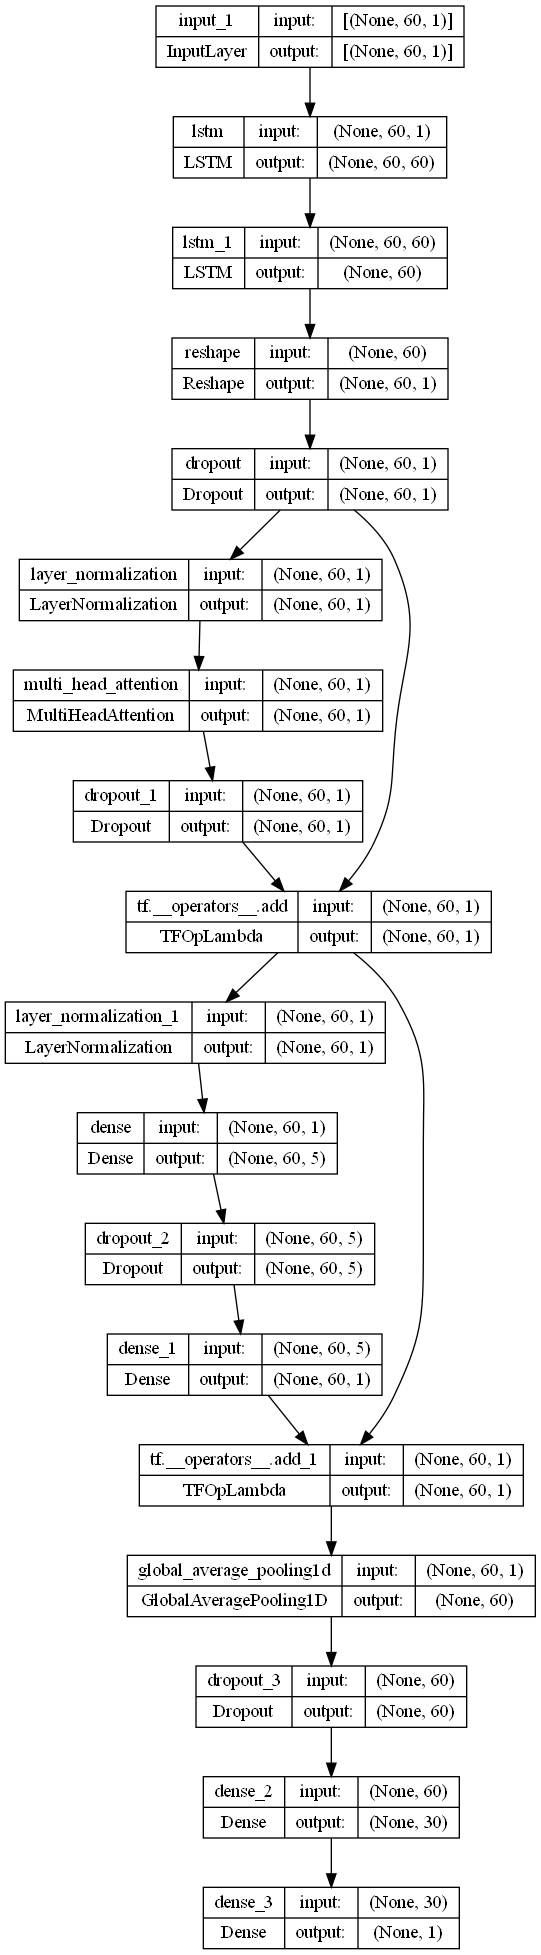

In [23]:
keras.utils.plot_model(model, "model.png", show_shapes=True)

#keras.utils.plot_model(model1, "Model1.png", show_shapes=True)
#keras.utils.plot_model(model2, "Model2.png", show_shapes=True)

# Model and session save

In [30]:
import dill                            #pip install dill --user
import keras

# Calling `save('my_model.keras')` creates a zip archive `my_model.keras`.
model.save("LSTM_model.keras")

filename = 'globalsave_LSTM.pkl'
dill.dump_session(filename)



# It can be used to reconstruct the model identically.
#reconstructed_model = keras.models.load_model("LSTM_model.keras")
#model = keras.models.load_model('LSTM_model.keras')
# Let's check:
#np.testing.assert_allclose(
#    model.predict(test_input), reconstructed_model.predict(test_input)
#)

INFO:tensorflow:Assets written to: ram://4f8804f4-1c21-4093-a307-bcfa88501c1f/assets


INFO:tensorflow:Assets written to: ram://4f8804f4-1c21-4093-a307-bcfa88501c1f/assets


In [17]:
## Saving as pickle file


import pickle

# save the iris classification model as a pickle file
model_pkl_file = "LSTM_attention_model_290.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(reconstructed_model, file)

NameError: name 'reconstructed_model' is not defined

# Saved Model Load from Disk

In [31]:
# load model from keras file


import numpy as np
import keras
import dill                            #pip install dill --user


#filename = 'globalsave_LSTM.pkl'

#dill.load_session(filename)

reconstructed_model = keras.models.load_model("LSTM_attention_model_290.keras")

# Let's check:
np.testing.assert_allclose(
    reconstructed_model.predict(x_test), reconstructed_model.predict(x_test)
)


19/19 [==============================] - 0s 22ms/step


In [19]:
import pickle

model_pkl_file = "LSTM_attention_model1.pkl" 

with open(model_pkl_file, 'rb') as file:  
    reconstructed_model = pickle.load(file)


        
# evaluate model 
y_predict = reconstructed_model.predict(x_test)

# check results
#print(classification_report(y_test, y_predict)) 

FileNotFoundError: [Errno 2] No such file or directory: 'LSTM_attention_model1.pkl'

In [32]:
reconstructed_model.summary()



predictions = reconstructed_model.predict(x_test)
print(predictions.shape)

predictions=np.reshape(predictions,(predictions.shape[0], predictions.shape[1]))
#print(x_test.shape)

# un-scaling 
predictions = scaler.inverse_transform(predictions)


rmse= np.sqrt( np.mean((predictions - y_test)**2))
print('Root Mean Square Error',rmse)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 60, 1)]              0         []                            
                                                                                                  
 lstm (LSTM)                 (None, 60, 60)               14880     ['input_1[0][0]']             
                                                                                                  
 lstm_1 (LSTM)               (None, 60)                   29040     ['lstm[0][0]']                
                                                                                                  
 reshape (Reshape)           (None, 60, 1)                0         ['lstm_1[0][0]']              
                                                                                              

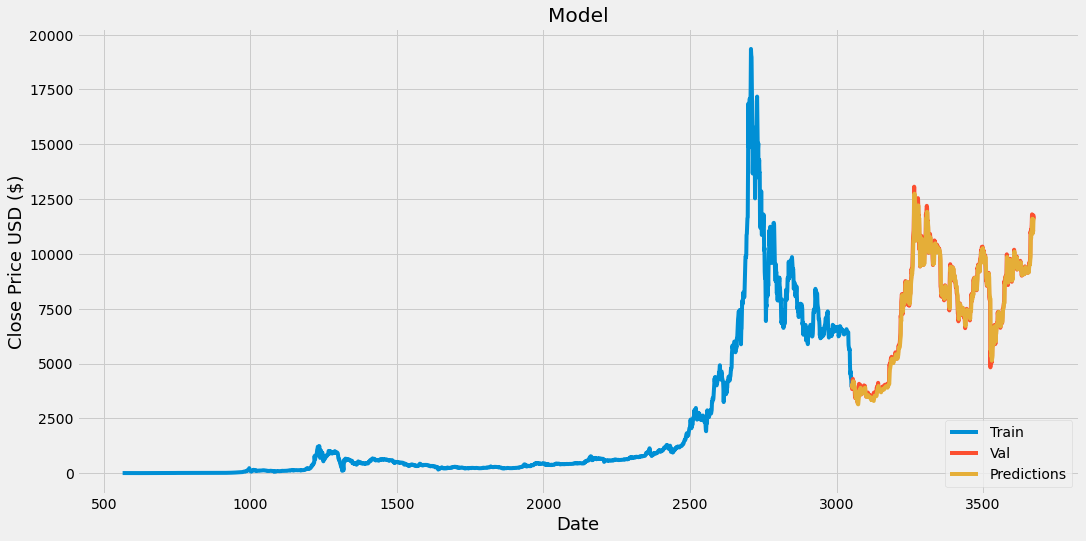

In [21]:
#plot the data

train=data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']=predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val', 'Predictions'], loc = 'lower right')

In [17]:
#reconstructed_model = keras.models.load_model(
#    "LSTM_model.keras",
#    custom_objects={"CustomLayer": CustomLayer, "custom_fn": custom_fn},
#)

# Test Dataset!

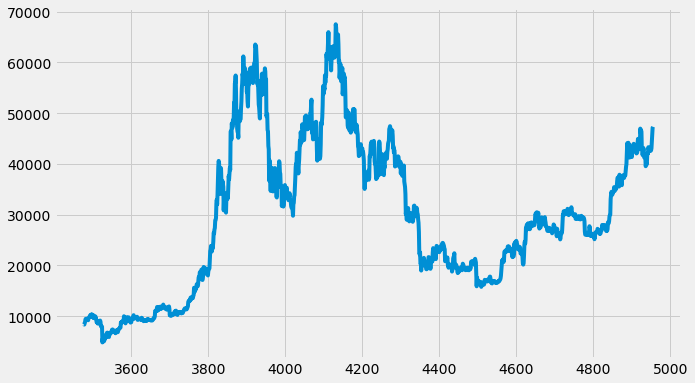

In [22]:
idxs=df2.index[df2['Date']=='2011-01-06'].values
#print(idxs, df2.Close[idxs])
#print(idxs)
idxn=df2.index[df2['Date']=='2020-01-23'].values
#print('ddd',idxn)

dataT=df2.filter(['Close'])  # Total dataset

data_new=dataT[int(idxn):]  # Dataset equal to the paper

#print(data)
#dataset=data.values
#print('dataset = ', dataset)
plt.plot(data_new)

(1282, 1)
[[0.02911256]
 [0.02766572]
 [0.03128716]
 ...
 [0.6128784 ]
 [0.64481324]
 [0.64832326]]
(1222, 60)


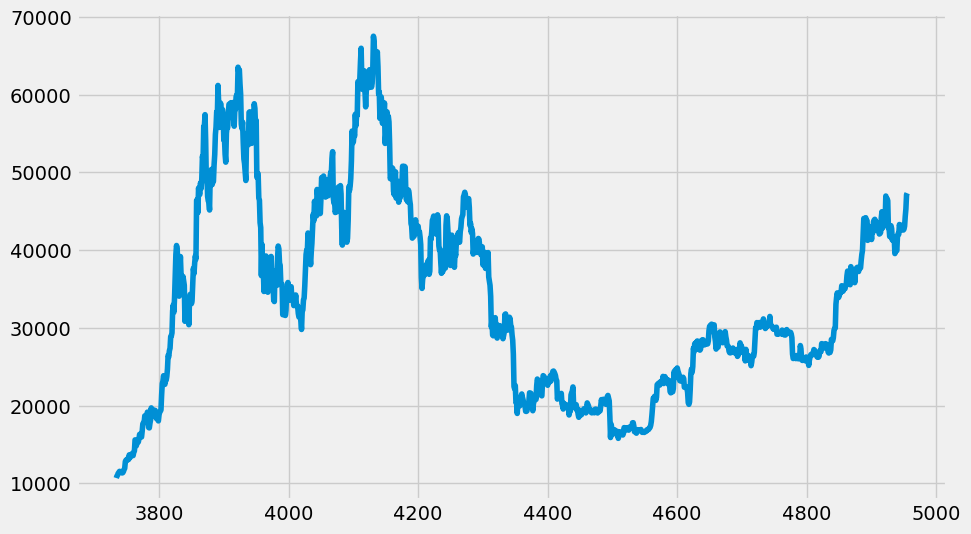

In [62]:
##############################  TEST #######################



idxn=df2.index[df2['Date']=='2020-01-23'].values
#print('ddd',idxn)

dataT=df2.filter(['Close'])  # Total dataset

data_new=dataT[int(idxn):]  # Dataset after the date 23/01/2020


### or

data_new=dataT[3674:]

#data_new=dataT[2584:]


print(data_new.shape)




scaler = MinMaxScaler(feature_range=(0,1))
scaled_data_new=scaler.fit_transform(data_new)
#y_test= dataset [training_data_len:, :]
test_data_new=scaled_data_new
print(scaled_data_new)


x_test=[]
y_test= data_new[60:]


for i in range (60, len(test_data_new)):
    x_test.append(test_data_new[i-60:i,0])

x_test= np.array(x_test)

print(x_test.shape)

x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

    
plt.plot(y_test)
#print(x_test)
#print(y_test)


In [56]:
# if loaded from saved model 
predictions = reconstructed_model.predict(x_test)
print(predictions.shape)

predictions=np.reshape(predictions,(predictions.shape[0], predictions.shape[1]))
#print(x_test.shape)

# un-scaling 
predictions = scaler.inverse_transform(predictions)



NameError: name 'reconstructed_model' is not defined

In [63]:
predictions = model.predict(x_test)
print(predictions.shape)

predictions=np.reshape(predictions,(predictions.shape[0], predictions.shape[1]))
#print(x_test.shape)

# un-scaling 
predictions = scaler.inverse_transform(predictions)



39/39 [==============================] - 1s 19ms/step
(1222, 1)


In [23]:
#Get the root mean squared error (RMSE) 

rmse= np.sqrt( np.mean((predictions - y_test)**2))
rmse


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score


# Calculate test metrics
mse = mean_squared_error(y_test.values, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test.values, predictions)

r2 = r2_score(y_test.values, predictions)
evs = explained_variance_score(y_test.values, predictions)

mape = np.mean(np.abs((y_test.values, predictions) / y_test.values)) * 100
mpe = np.mean((y_test.values, predictions) / y_test.values) * 100

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root-Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R2 Score: {r2}")
print(f"Explained Variance Score: {evs}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Mean Percentage Error (MPE): {mpe}")

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [65]:
print(predictions.shape)

(1222, 1)


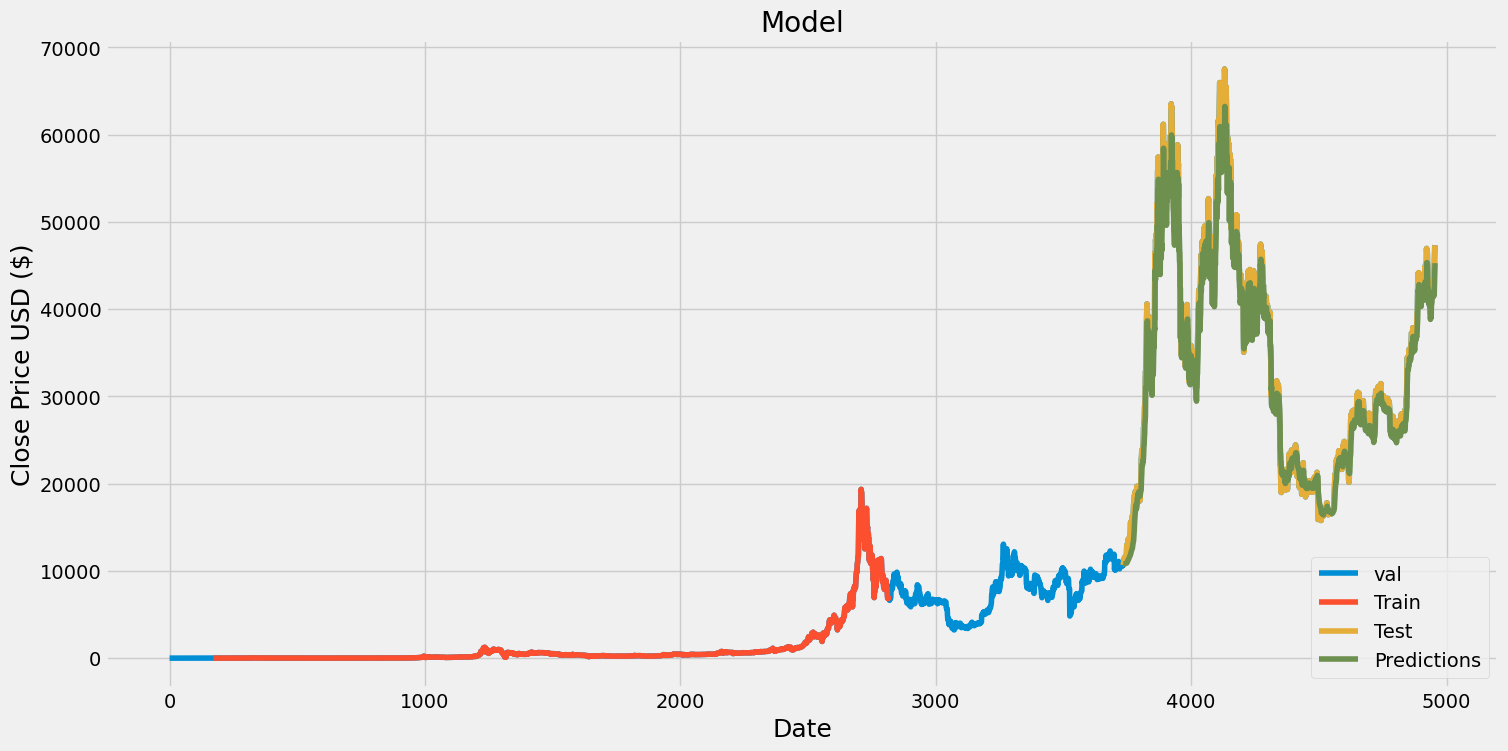

In [67]:
#train=data[:training_data_len]
#valid = data[training_data_len:]
#valid['Predictions']=predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(dataT)
plt.plot(train)
#plt.plot(y_test.values)
plt.plot(y_test)
plt.plot(y_test.index, predictions)

#plt.plot(train['Close'])
#plt.plot(valid[['Close', 'Predictions']])
plt.legend(['val','Train', 'Test', 'Predictions'], loc = 'lower right')

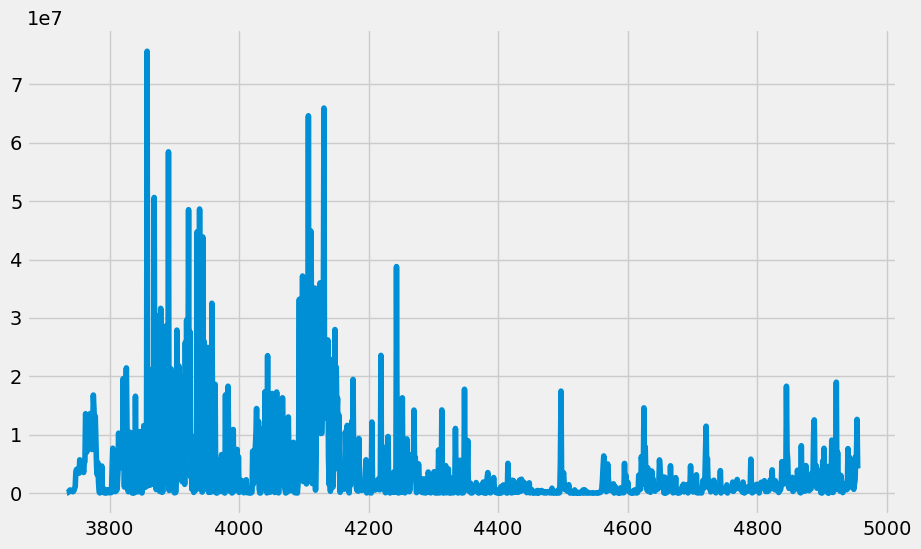

In [112]:
error=((y_test-predictions)**2)
plt.plot(error)

#rmse= np.sqrt(np.sum(error)/len(error))
#print(rmse)

In [70]:
import yfinance as yf

In [74]:
bitcoin = yf.download("BTC-USD", start="2011-01-06", end="2024-4-21")

[*********************100%%**********************]  1 of 1 completed


[1522]
[4955]
[3433]


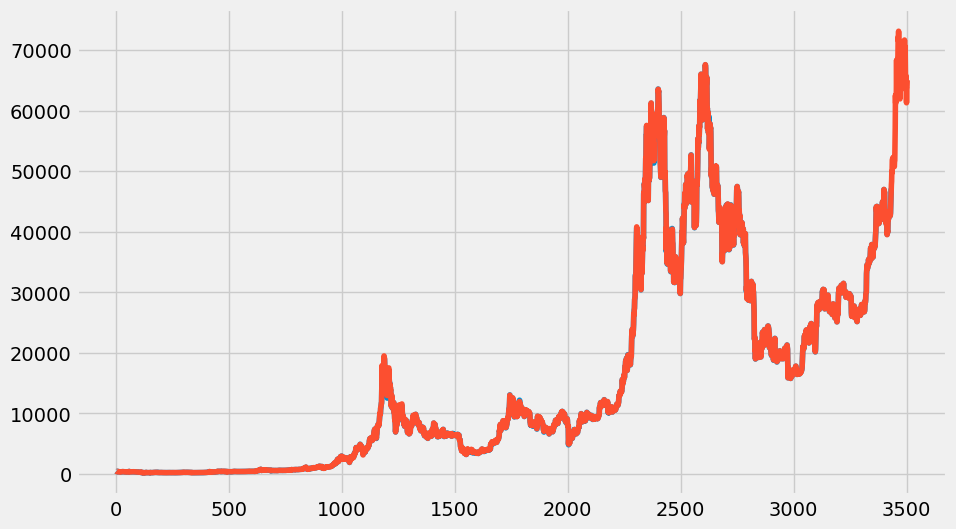

In [110]:
bitcoin_close = bitcoin['Close'].reset_index()


idxs=df2.index[df2['Date']=='2014-09-17'].values
print(idxs)

idxn=df2.index[df2['Date']=='2024-02-10'].values
print(idxn)



idxp=bitcoin_close.index[bitcoin_close['Date']=='2024-02-10'].values
print(idxp)


plt.plot(bitcoin_close['Close'][0:int(idxp)].index, df2['Close'][int(idxs):int(idxn)])
plt.plot(bitcoin_close['Close'].index, bitcoin_close['Close'].values)

In [93]:
print(bitcoin_close)
print(df2)

           Date         Close
0    2014-09-17    457.334015
1    2014-09-18    424.440002
2    2014-09-19    394.795990
3    2014-09-20    408.903992
4    2014-09-21    398.821014
...         ...           ...
3499 2024-04-16  63811.863281
3500 2024-04-17  61276.691406
3501 2024-04-18  63512.753906
3502 2024-04-19  63843.570312
3503 2024-04-20  64994.441406

[3504 rows x 2 columns]
           Date    Close     Open     High      Low Trading_volume Price
0    2010-07-18      0.1      0.0      0.1      0.1          0.08K   0.0
1    2010-07-19      0.1      0.1      0.1      0.1          0.57K   0.0
2    2010-07-20      0.1      0.1      0.1      0.1          0.26K   0.0
3    2010-07-21      0.1      0.1      0.1      0.1          0.58K   0.0
4    2010-07-22      0.1      0.1      0.1      0.1          2.16K   0.0
...         ...      ...      ...      ...      ...            ...   ...
4951 2024-02-06  43087.7  42697.6  43375.5  42566.8         33.32K  0.01
4952 2024-02-07  44339.8  43088

In [96]:
idxs=df2.index[df2['Date']=='2014-09-17'].values
print(idxs)

[1522]
